# Ensemble Methods Project: UHC Service Coverage Index Prediction
Dette notebook demonstrerer bruk av ensemble-metoder (bagging, boosting, stacking) i Python via Jupyter i VSCode for å utforske og predikere Universal Health Coverage (UHC) Service Coverage Index.

## 1. Data Inspection
- Sjekk datastruktur og manglende verdier

In [5]:
# Check data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               1358 non-null   object 
 1   Indicator                   1358 non-null   object 
 2   ValueType                   1358 non-null   object 
 3   ParentLocationCode          1358 non-null   object 
 4   ParentLocation              1358 non-null   object 
 5   Location type               1358 non-null   object 
 6   SpatialDimValueCode         1358 non-null   object 
 7   Location                    1358 non-null   object 
 8   Period type                 1358 non-null   object 
 9   Period                      1358 non-null   int64  
 10  IsLatestYear                1358 non-null   bool   
 11  Dim1 type                   0 non-null      float64
 12  Dim1                        0 non-null      float64
 13  Dim1ValueCode               0 non

/var/folders/b9/pvvr6hv50855m46y_0gsscr40000gn/T/ipykernel_41596/3596348570.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=missing_counts.values, y=missing_counts.index, palette='viridis')


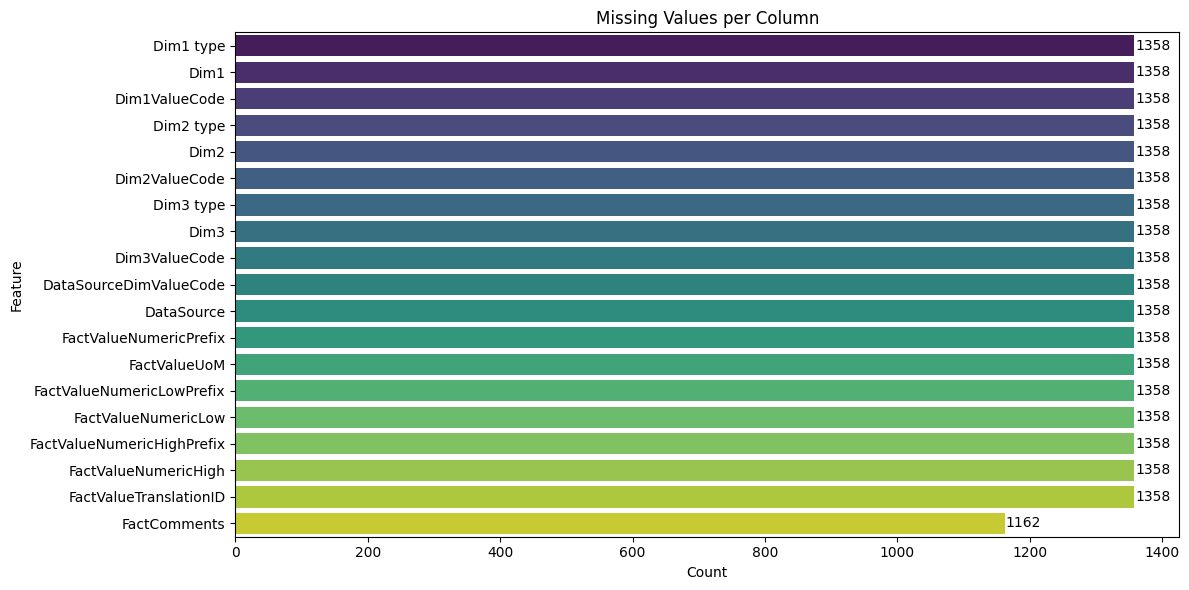

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting missing values
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Plot with value labels
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=missing_counts.values, y=missing_counts.index, palette='viridis')
plt.title('Missing Values per Column')
plt.xlabel('Count')
plt.ylabel('Feature')
plt.tight_layout()

# Add counts next to bars
for index, value in enumerate(missing_counts.values):
    plt.text(value + 1, index, str(value), va='center')

plt.show()


## 2. Missing Values Analysis
- Oppsummering av manglende data

In [14]:
### 🔍 Missing Values Summary

This chart highlights the number of missing entries in each column. Columns with the highest missing values (like `FactComments` and `FactValueTranslationID`) may be less useful for modeling. Depending on our strategy, we might drop them or impute with default values.


SyntaxError: invalid syntax (2120238828.py, line 3)

In [12]:
# Unique indicators
print("Indicators:\n", df['Indicator'].unique()[:5], '...\n')

# Unique locations
print("Number of unique locations:", df['Location'].nunique())
print(df['Location'].unique()[:5], '...\n')

# Period distribution
print("Available years and frequency:\n")
print(df['Period'].value_counts().sort_index())


Indicators:
 ['UHC Service Coverage Index (SDG 3.8.1)'] ...

Number of unique locations: 194
['Australia' 'Austria' 'Belgium' 'Brazil' 'Canada'] ...

Available years and frequency:

Period
2000    194
2005    194
2010    194
2015    194
2017    194
2019    194
2021    194
Name: count, dtype: int64


## 3. Categorical Feature Exploration
- Utforske nøkkelkategoriske variabler

In [17]:
### Exploring Key Categorical Features

In this step, we examine the contents of important columns like `Indicator`, `Location`, and `Period`. This helps us understand:
- What kinds of health indicators are included in the dataset
- The geographical coverage (how many regions or countries are represented)
- The time span of the dataset, and how frequently each year appears

Understanding these categories early helps us shape our data filtering strategy and identify which features might be useful for analysis or modeling later on.

SyntaxError: invalid syntax (406048019.py, line 3)

## 4. Filtering to Latest UHC Values
- Velge kun de siste års UHC-data

In [21]:
# Step 1: Filter to latest year
df_latest = df[df['IsLatestYear'] == 1]

# Step 2: Filter by the correct UHC indicator
indicator_filter = 'UHC Service Coverage Index (SDG 3.8.1)'
df_filtered = df_latest[df_latest['Indicator'] == indicator_filter]

# Step 3: Keep only necessary columns and rename
columns_to_keep = ['Location', 'Period', 'FactValueNumeric']
df_final = df_filtered[columns_to_keep].rename(columns={
    'FactValueNumeric': 'UHC_Index'
})

# Preview the cleaned dataset
print("Shape of final dataset:", df_final.shape)
df_final.head()


Shape of final dataset: (194, 3)


,Location,Period,UHC_Index
0,Australia,2021,80.0
1,Austria,2021,80.0
2,Belgium,2021,80.0
3,Brazil,2021,80.0
4,Canada,2021,80.0


## 5. Focused Filtering: UHC Service Coverage Index
- Spesifikk filtrering for UHC-indeksen

In [22]:
###  Focused Filtering: UHC Service Coverage Index

We refined our dataset to include:
- Only the **latest available year** (based on the `IsLatestYear` flag)
- One focused health metric: **UHC Service Coverage Index (SDG 3.8.1)**
- Relevant fields for analysis: `Location`, `Period`, and the numeric value of the index

This filtered dataset will allow us to visualize and compare UHC performance across countries in the most recent year available.


SyntaxError: invalid syntax (3200096699.py, line 3)

## 6. Visualization of UHC Distribution
- Plotting med fremtidssikker palette

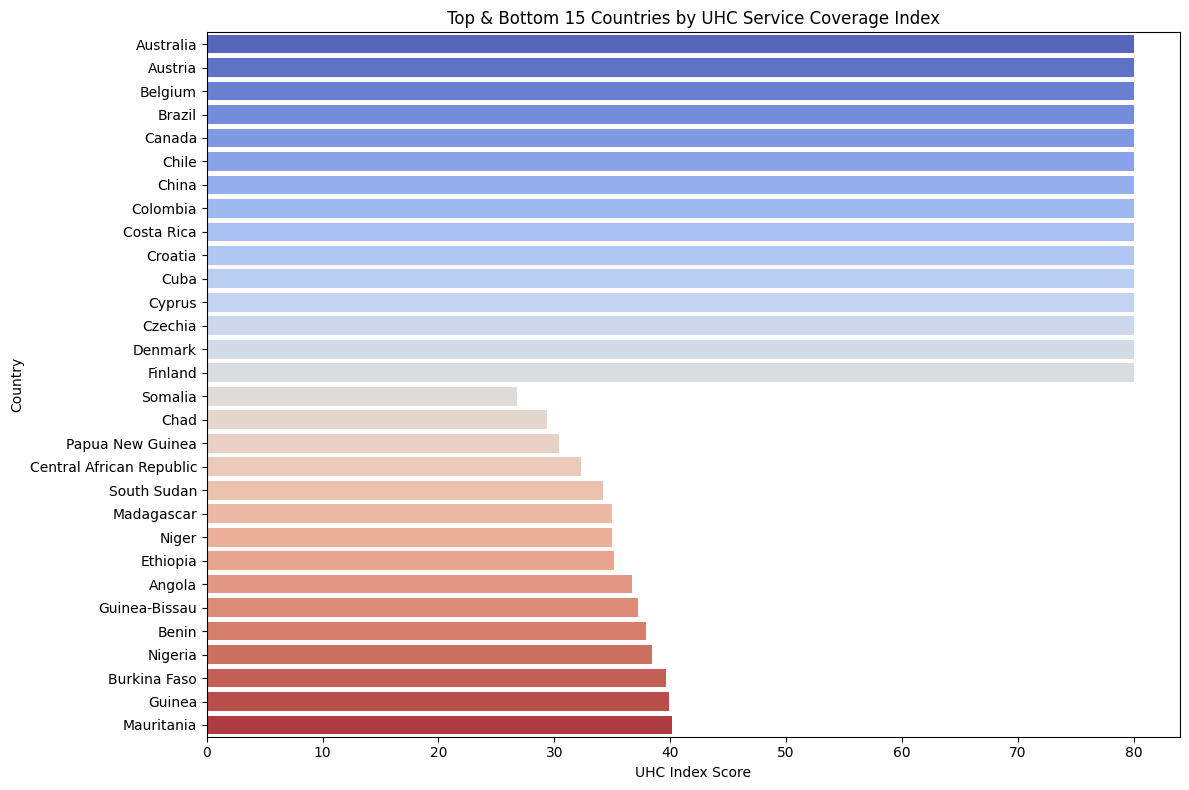

In [25]:
# Plot with future-safe palette usage
plt.figure(figsize=(12, 8))
sns.barplot(
    data=subset_df,
    y='Location', x='UHC_Index',
    hue='Location',  # Add this line to explicitly assign hue
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Top & Bottom 15 Countries by UHC Service Coverage Index')
plt.xlabel('UHC Index Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



In [ ]:
### 🧭 Focused UHC Score Comparison

The previous full-country chart was overwhelming, so here we focus on just the top and bottom 15 countries in terms of UHC index scores. This improves readability and draws clearer attention to global disparities in health service coverage.


In [26]:
# Summary statistics
print("Global UHC Score Statistics:\n")
print(df_final['UHC_Index'].describe())

# Top 10 countries
print("\nTop 10 Countries by UHC Index:\n")
print(df_final.sort_values(by='UHC_Index', ascending=False).head(10))

# Bottom 10 countries
print("\nBottom 10 Countries by UHC Index:\n")
print(df_final.sort_values(by='UHC_Index', ascending=True).head(10))


Global UHC Score Statistics:

count    194.000000
mean      64.285361
std       15.207259
min       26.790000
25%       51.672500
50%       68.685000
75%       78.560000
max       80.000000
Name: UHC_Index, dtype: float64

Top 10 Countries by UHC Index:

     Location  Period  UHC_Index
0   Australia    2021       80.0
1     Austria    2021       80.0
2     Belgium    2021       80.0
3      Brazil    2021       80.0
4      Canada    2021       80.0
5       Chile    2021       80.0
6       China    2021       80.0
7    Colombia    2021       80.0
8  Costa Rica    2021       80.0
9     Croatia    2021       80.0

Bottom 10 Countries by UHC Index:

                    Location  Period  UHC_Index
43                   Somalia    2021      26.79
44                      Chad    2021      29.40
45          Papua New Guinea    2021      30.39
46  Central African Republic    2021      32.26
47               South Sudan    2021      34.18
49                Madagascar    2021      34.94
50        

In [ ]:
### Summary Stats and Global Rankings

We calculate the global average, standard deviation, and range of UHC scores. Then we rank the top and bottom 10 countries to highlight performance extremes in health service coverage.

This provides critical context before regional breakdowns or machine learning — it's essential to know what “low” and “high” actually mean in this dataset.


In [27]:
# Keep only the UHC indicator (already done before)
uhc_df = df_latest[df_latest['Indicator'] == 'UHC Service Coverage Index (SDG 3.8.1)']

# Group by ParentLocation and calculate mean
regional_avg = uhc_df.groupby('ParentLocation')['FactValueNumeric'].mean().reset_index()
regional_avg = regional_avg.rename(columns={
    'ParentLocation': 'Region',
    'FactValueNumeric': 'Average_UHC_Index'
})

# Sort for nice plotting
regional_avg = regional_avg.sort_values(by='Average_UHC_Index', ascending=False)
regional_avg


,Region,Average_UHC_Index
3,Europe,76.757358
1,Americas,73.239429
2,Eastern Mediterranean,61.941429
5,Western Pacific,61.167407
4,South-East Asia,60.426364
0,Africa,47.294894


/var/folders/b9/pvvr6hv50855m46y_0gsscr40000gn/T/ipykernel_41596/3650398565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


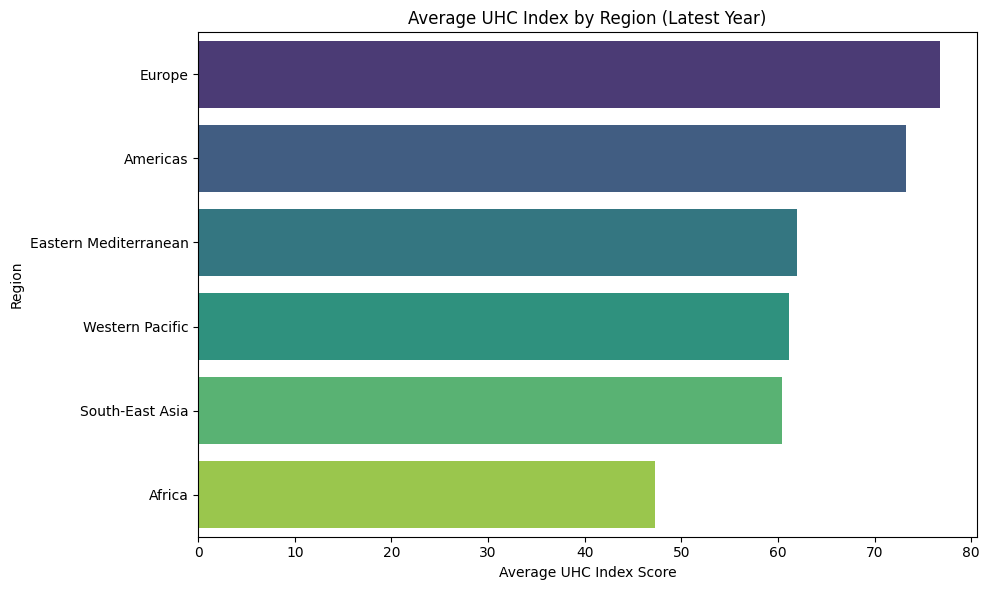

In [29]:
# Bar plot: Average UHC score by region
plt.figure(figsize=(10, 6))
sns.barplot(
    data=regional_avg,
    y='Region', x='Average_UHC_Index',
    palette='viridis'
)

plt.title('Average UHC Index by Region (Latest Year)')
plt.xlabel('Average UHC Index Score')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


In [ ]:
### Regional Differences in UHC Service Coverage

This bar chart shows the average UHC Service Coverage Index across global regions. Grouping countries helps us identify geographic disparities and patterns in healthcare access and quality — insights that aren’t visible in country-level scatter.

These regional averages can guide future analysis, like clustering or policy benchmarking.


In [31]:
# Prepare country-level data with region included
uhc_df = df_latest[df_latest['Indicator'] == 'UHC Service Coverage Index (SDG 3.8.1)']
df_model = uhc_df[['Location', 'ParentLocation', 'FactValueNumeric']].rename(columns={
    'ParentLocation': 'Region',
    'FactValueNumeric': 'UHC_Index'
})

# Merge with regional averages
df_model = pd.merge(
    df_model,
    regional_avg,         # Has Region + Average_UHC_Index
    on='Region',
    how='left'
)

df_model.head()



,Location,Region,UHC_Index,Average_UHC_Index
0,Australia,Western Pacific,80.0,61.167407
1,Austria,Europe,80.0,76.757358
2,Belgium,Europe,80.0,76.757358
3,Brazil,Americas,80.0,73.239429
4,Canada,Americas,80.0,73.239429


In [ ]:
### Preparing Features for Modeling

Before building machine learning models, we prepare a clean feature table. For this step, we:
- Use UHC index as the target variable (`UHC_Index`)
- Add regional groupings (`Region`) as a categorical feature

In the next steps, we’ll engineer further features or merge additional health/economic data to strengthen our prediction model.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# One-hot encode the 'Region' column
encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(df_model[['Region']])

# Create feature matrix (region encodings)
X = region_encoded
y = df_model['UHC_Index'].values  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (155, 6)
Test set shape: (39, 6)


In [ ]:
### Categorical Encoding and Train-Test Split

We converted the `Region` categorical feature into a numerical format using **one-hot encoding**. This creates binary flags for each region to use in modeling.

We also split the dataset into training (80%) and testing (20%) sets to evaluate the performance of our machine learning models fairly.


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R² Score: {r2:.2f}")


Random Forest MSE: 101.43
Random Forest R² Score: 0.50


In [ ]:
### 🌳 Random Forest Regressor

We used a Random Forest Regressor with 100 trees to model UHC Index based on regional groupings. Evaluation shows how well regional features alone can predict UHC scores.

This model will serve as a baseline to compare against more complex ensemble methods like Gradient Boosting and XGBoost.


In [38]:
from xgboost import XGBRegressor

# Initialize the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")


XGBoost MSE: 101.72
XGBoost R² Score: 0.50


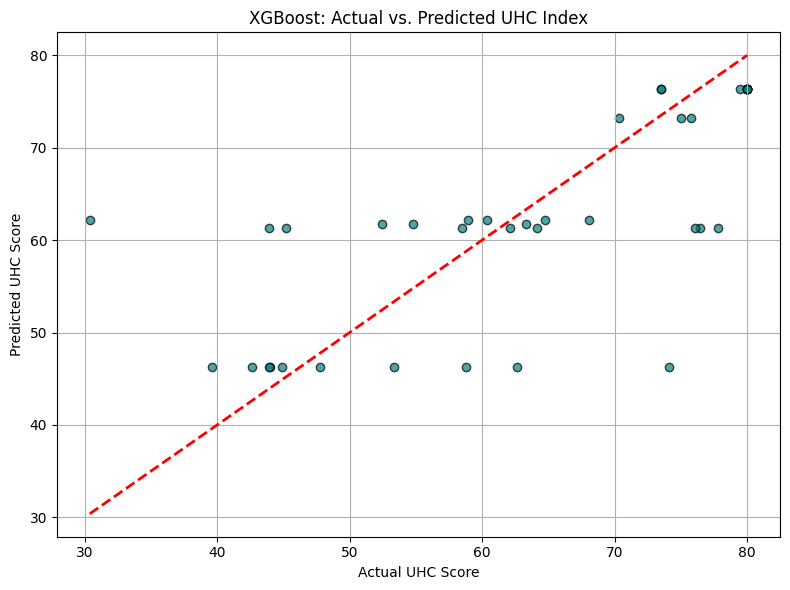

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='teal', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel("Actual UHC Score")
plt.ylabel("Predicted UHC Score")
plt.title("XGBoost: Actual vs. Predicted UHC Index")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

# Define base learners
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Meta-learner (can be any regressor)
meta_model = RidgeCV()

# Build stacking ensemble
stack = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f"Stacking MSE: {mse_stack:.2f}")
print(f"Stacking R² Score: {r2_stack:.2f}")


Stacking MSE: 99.92
Stacking R² Score: 0.51


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Linear Regression MSE: {mse_linear:.2f} | R² Score: {r2_linear:.2f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f} | R² Score: {r2_ridge:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f} | R² Score: {r2_lasso:.2f}")


Linear Regression MSE: 101.72 | R² Score: 0.50
Ridge Regression MSE: 101.15 | R² Score: 0.50
Lasso Regression MSE: 101.08 | R² Score: 0.50
